# 🩺 Analyse du Dataset de Dermatologie

Ce notebook effectue une analyse complète du dataset de dermatologie de Kaggle, incluant :
- **Chargement et exploration** des données
- **Preprocessing et nettoyage** (valeurs manquantes, outliers, normalisation)
- **Réduction de dimensionnalité** PCA
- **Visualisations** comparatives des différentes méthodes

## 1. Import des Bibliothèques

In [30]:

# Manipulation de données
import pandas as pd
import numpy as np
import os
import time
import warnings
warnings.filterwarnings('ignore')

# Téléchargement du dataset
import kagglehub

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Réduction de dimensionnalité
from sklearn.decomposition import PCA


# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Toutes les bibliothèques ont été importées avec succès!")

✅ Toutes les bibliothèques ont été importées avec succès!


## 2. Téléchargement et Chargement du Dataset

In [ ]:
# =============================================================================
# TÉLÉCHARGEMENT DU DATASET DEPUIS KAGGLE
# =============================================================================

# Téléchargement du dataset de dermatologie
path = kagglehub.dataset_download("olcaybolat1/dermatology-dataset-classification")
print(f"📁 Chemin vers les fichiers du dataset: {path}")

# Lister les fichiers disponibles
print("\n📄 Fichiers disponibles dans le dataset:")
for file in os.listdir(path):
    print(f"   - {file}")

📁 Chemin vers les fichiers du dataset: C:\Users\user\.cache\kagglehub\datasets\olcaybolat1\dermatology-dataset-classification\versions\5

📄 Fichiers disponibles dans le dataset:
   - dermatology_database_1.csv


In [32]:
# =============================================================================
# CHARGEMENT DU DATASET
# =============================================================================

# Trouver le fichier CSV dans le répertoire
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    data_file = os.path.join(path, csv_files[0])
else:
    # Essayer avec .data ou autre extension
    data_files = os.listdir(path)
    data_file = os.path.join(path, data_files[0])

# Charger le dataset
df = pd.read_csv(data_file)

print(f"✅ Dataset chargé avec succès!")
print(f"📊 Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")

✅ Dataset chargé avec succès!
📊 Dimensions: 366 lignes × 35 colonnes


## 3. Exploration des Données

In [33]:
# =============================================================================
# APERÇU DES PREMIÈRES LIGNES
# =============================================================================

print("📋 Premières lignes du dataset:")
print("=" * 80)
df.head(10)

📋 Premières lignes du dataset:


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30,4


In [34]:
# =============================================================================
# INFORMATIONS SUR LES TYPES DE DONNÉES
# =============================================================================

print("📊 Informations sur le dataset:")
print("=" * 80)
df.info()
print("\n" + "=" * 80)
print(f"\n🔢 Types de données uniques: {df.dtypes.value_counts().to_dict()}")

📊 Informations sur le dataset:
<class 'pandas.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   erythema                             366 non-null    int64
 1   scaling                              366 non-null    int64
 2   definite_borders                     366 non-null    int64
 3   itching                              366 non-null    int64
 4   koebner_phenomenon                   366 non-null    int64
 5   polygonal_papules                    366 non-null    int64
 6   follicular_papules                   366 non-null    int64
 7   oral_mucosal_involvement             366 non-null    int64
 8   knee_and_elbow_involvement           366 non-null    int64
 9   scalp_involvement                    366 non-null    int64
 10  family_history                       366 non-null    int64
 11  melanin_incontinence                 3

In [35]:
# =============================================================================
# IDENTIFICATION DES FEATURES ET DE LA VARIABLE CIBLE
# =============================================================================

# Afficher les noms des colonnes
print("📋 Liste des colonnes:")
print("=" * 80)
for i, col in enumerate(df.columns):
    print(f"   {i+1:2d}. {col}")

# La variable cible est généralement la dernière colonne (class)
target_col = df.columns[-1]
feature_cols = df.columns[:-1].tolist()

print(f"\n🎯 Variable cible identifiée: '{target_col}'")
print(f"📊 Nombre de features: {len(feature_cols)}")

# Vérifier les classes uniques
print(f"\n🏷️ Classes uniques dans '{target_col}': {df[target_col].unique()}")
print(f"📈 Nombre de classes: {df[target_col].nunique()}")

📋 Liste des colonnes:
    1. erythema
    2. scaling
    3. definite_borders
    4. itching
    5. koebner_phenomenon
    6. polygonal_papules
    7. follicular_papules
    8. oral_mucosal_involvement
    9. knee_and_elbow_involvement
   10. scalp_involvement
   11. family_history
   12. melanin_incontinence
   13. eosinophils_infiltrate
   14. PNL_infiltrate
   15. fibrosis_papillary_dermis
   16. exocytosis
   17. acanthosis
   18. hyperkeratosis
   19. parakeratosis
   20. clubbing_rete_ridges
   21. elongation_rete_ridges
   22. thinning_suprapapillary_epidermis
   23. spongiform_pustule
   24. munro_microabcess
   25. focal_hypergranulosis
   26. disappearance_granular_layer
   27. vacuolisation_damage_basal_layer
   28. spongiosis
   29. saw_tooth_appearance_retes
   30. follicular_horn_plug
   31. perifollicular_parakeratosis
   32. inflammatory_mononuclear_infiltrate
   33. band_like_infiltrate
   34. age
   35. class

🎯 Variable cible identifiée: 'class'
📊 Nombre de features: 

In [36]:
# =============================================================================
# STATISTIQUES DESCRIPTIVES
# =============================================================================

print("📊 Statistiques descriptives:")
print("=" * 80)
df.describe(include='all').T

📊 Statistiques descriptives:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
erythema,366.0,NaN,NaN,NaN,2.068306,0.664753,0.0,2.0,2.0,2.0,3.0
scaling,366.0,NaN,NaN,NaN,1.795082,0.701527,0.0,1.0,2.0,2.0,3.0
definite_borders,366.0,NaN,NaN,NaN,1.54918,0.907525,0.0,1.0,2.0,2.0,3.0
itching,366.0,NaN,NaN,NaN,1.36612,1.138299,0.0,0.0,1.0,2.0,3.0
koebner_phenomenon,366.0,NaN,NaN,NaN,0.63388,0.908016,0.0,0.0,0.0,1.0,3.0
polygonal_papules,366.0,NaN,NaN,NaN,0.448087,0.957327,0.0,0.0,0.0,0.0,3.0
follicular_papules,366.0,NaN,NaN,NaN,0.166667,0.570588,0.0,0.0,0.0,0.0,3.0
oral_mucosal_involvement,366.0,NaN,NaN,NaN,0.377049,0.834147,0.0,0.0,0.0,0.0,3.0
knee_and_elbow_involvement,366.0,NaN,NaN,NaN,0.614754,0.982979,0.0,0.0,0.0,1.0,3.0
scalp_involvement,366.0,NaN,NaN,NaN,0.519126,0.905639,0.0,0.0,0.0,1.0,3.0


## 4. Preprocessing et Nettoyage des Données

In [37]:
# =============================================================================
# DÉTECTION DES VALEURS MANQUANTES
# =============================================================================

print("🔍 Analyse des valeurs manquantes:")
print("=" * 80)

# Compter les valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# Créer un DataFrame récapitulatif
missing_df = pd.DataFrame({
    'Valeurs manquantes': missing_values,
    'Pourcentage (%)': missing_percent
})
missing_df = missing_df[missing_df['Valeurs manquantes'] > 0].sort_values(by='Pourcentage (%)', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
    print(f"\n⚠️ {len(missing_df)} colonnes contiennent des valeurs manquantes")
else:
    print("✅ Aucune valeur manquante détectée!")

# Vérifier aussi les valeurs '?' qui peuvent représenter des valeurs manquantes
print("\n🔍 Vérification des valeurs '?' (potentielles valeurs manquantes):")
for col in df.columns:
    if df[col].dtype == 'object':
        q_count = (df[col] == '?').sum()
        if q_count > 0:
            print(f"   - {col}: {q_count} valeurs '?'")

🔍 Analyse des valeurs manquantes:
✅ Aucune valeur manquante détectée!

🔍 Vérification des valeurs '?' (potentielles valeurs manquantes):


In [38]:
# =============================================================================
# TRAITEMENT DES VALEURS MANQUANTES
# =============================================================================

# Créer une copie du DataFrame pour le traitement
df_clean = df.copy()

# Remplacer les '?' par NaN
df_clean = df_clean.replace('?', np.nan)

# Convertir les colonnes numériques
for col in df_clean.columns:
    try:
        df_clean[col] = pd.to_numeric(df_clean[col])
    except:
        pass

# Séparer features et target
X = df_clean[feature_cols].copy()
y = df_clean[target_col].copy()

# Imputation des valeurs manquantes avec la médiane pour les features numériques
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

if X[numeric_cols].isnull().sum().sum() > 0:
    print("🔧 Imputation des valeurs manquantes avec la médiane...")
    imputer = SimpleImputer(strategy='median')
    X[numeric_cols] = imputer.fit_transform(X[numeric_cols])
    print("✅ Imputation terminée!")
else:
    print("✅ Aucune valeur manquante à imputer dans les features numériques")

print(f"\n📊 Dimensions après nettoyage: {X.shape}")

🔧 Imputation des valeurs manquantes avec la médiane...
✅ Imputation terminée!

📊 Dimensions après nettoyage: (366, 34)


🔍 Détection des outliers (méthode IQR):
                          Feature  Nombre d'outliers
                       acanthosis                156
                         erythema                151
                munro_microabcess                 80
             band_like_infiltrate                 77
       saw_tooth_appearance_retes                 72
 vacuolisation_damage_basal_layer                 72
            focal_hypergranulosis                 71
               spongiform_pustule                 70
             melanin_incontinence                 70
                polygonal_papules                 69
         oral_mucosal_involvement                 67
        fibrosis_papillary_dermis                 54
                   family_history                 46
           eosinophils_infiltrate                 42
               follicular_papules                 33
thinning_suprapapillary_epidermis                 31
       knee_and_elbow_involvement                 23
      

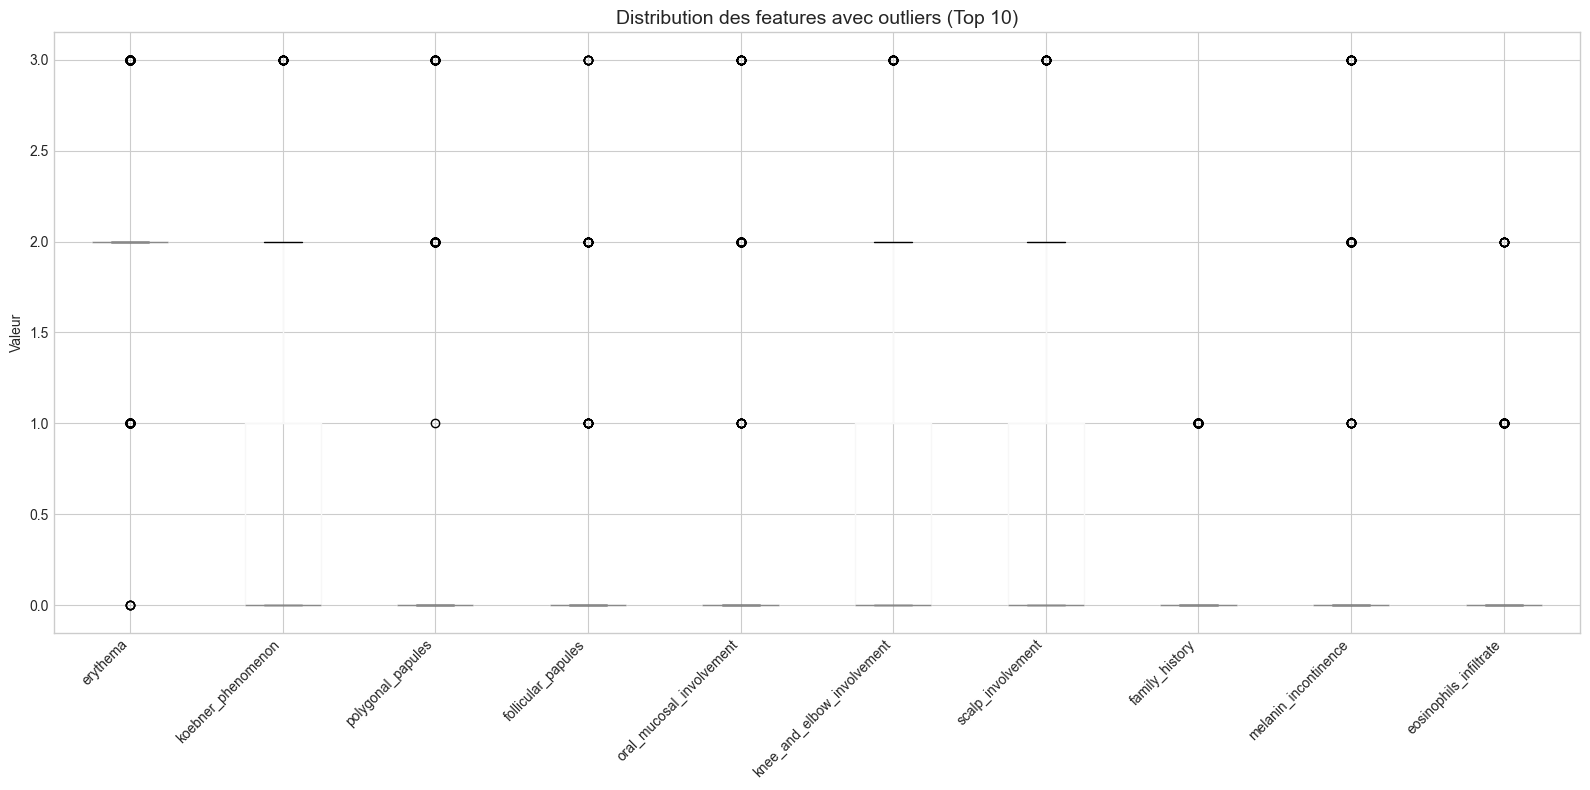

In [39]:
# =============================================================================
# DÉTECTION ET GESTION DES OUTLIERS (Méthode IQR)
# =============================================================================

def detect_outliers_iqr(df, columns):
    """
    Détecte les outliers en utilisant la méthode IQR (Interquartile Range)
    """
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        if outliers > 0:
            outlier_counts[col] = outliers
    return outlier_counts

print("🔍 Détection des outliers (méthode IQR):")
print("=" * 80)

outliers = detect_outliers_iqr(X, numeric_cols)
if outliers:
    outlier_df = pd.DataFrame(list(outliers.items()), columns=['Feature', 'Nombre d\'outliers'])
    outlier_df = outlier_df.sort_values(by='Nombre d\'outliers', ascending=False)
    print(outlier_df.to_string(index=False))
    print(f"\n⚠️ {len(outliers)} features contiennent des outliers")
else:
    print("✅ Aucun outlier significatif détecté")

# Visualisation des outliers avec boxplots
fig, axes = plt.subplots(figsize=(16, 8))
# Sélectionner les 10 features avec le plus d'outliers
if outliers:
    top_outlier_features = list(outliers.keys())[:min(10, len(outliers))]
    X[top_outlier_features].boxplot(ax=axes)
    plt.xticks(rotation=45, ha='right')
    plt.title('Distribution des features avec outliers (Top 10)', fontsize=14)
    plt.ylabel('Valeur')
    plt.tight_layout()
    plt.show()
else:
    # Montrer les 10 premières features
    X[numeric_cols[:10]].boxplot(ax=axes)
    plt.xticks(rotation=45, ha='right')
    plt.title('Distribution des 10 premières features', fontsize=14)
    plt.ylabel('Valeur')
    plt.tight_layout()
    plt.show()

In [40]:
# =============================================================================
# NORMALISATION/STANDARDISATION DES FEATURES
# =============================================================================

print("🔧 Standardisation des features numériques...")
print("=" * 80)

# Standardisation avec StandardScaler (moyenne=0, écart-type=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_cols])
X_scaled = pd.DataFrame(X_scaled, columns=numeric_cols, index=X.index)

print("✅ Standardisation terminée!")
print(f"\n📊 Statistiques après standardisation:")
print(f"   - Moyenne: {X_scaled.mean().mean():.6f} (≈ 0)")
print(f"   - Écart-type: {X_scaled.std().mean():.6f} (≈ 1)")

🔧 Standardisation des features numériques...
✅ Standardisation terminée!

📊 Statistiques après standardisation:
   - Moyenne: -0.000000 (≈ 0)
   - Écart-type: 1.001369 (≈ 1)


In [41]:
# =============================================================================
# ENCODAGE DE LA VARIABLE CIBLE
# =============================================================================

print("🔧 Encodage de la variable cible...")
print("=" * 80)

# Vérifier le type de la variable cible
print(f"Type de la variable cible: {y.dtype}")
print(f"Valeurs uniques: {y.unique()}")

# Encoder si nécessaire
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"\n✅ Encodage terminé!")
print(f"Mapping des classes:")
for i, cls in enumerate(le.classes_):
    print(f"   {cls} → {i}")

🔧 Encodage de la variable cible...
Type de la variable cible: int64
Valeurs uniques: [2 1 3 5 4 6]

✅ Encodage terminé!
Mapping des classes:
   1 → 0
   2 → 1
   3 → 2
   4 → 3
   5 → 4
   6 → 5


## 5. Analyse du Déséquilibre des Classes

In [42]:
# =============================================================================
# VÉRIFICATION DU DÉSÉQUILIBRE DES CLASSES
# =============================================================================

print("📊 Distribution des classes:")
print("=" * 80)

# Compter les occurrences de chaque classe
class_counts = pd.Series(y_encoded).value_counts().sort_index()
class_percentages = (class_counts / len(y_encoded) * 100).round(2)

# Créer un DataFrame récapitulatif
balance_df = pd.DataFrame({
    'Classe': le.classes_,
    'Effectif': class_counts.values,
    'Pourcentage (%)': class_percentages.values
})
print(balance_df.to_string(index=False))

# Calculer le ratio de déséquilibre
max_class = class_counts.max()
min_class = class_counts.min()
imbalance_ratio = max_class / min_class

print(f"\n📈 Statistiques de déséquilibre:")
print(f"   - Classe majoritaire: {class_counts.idxmax()} ({max_class} échantillons)")
print(f"   - Classe minoritaire: {class_counts.idxmin()} ({min_class} échantillons)")
print(f"   - Ratio de déséquilibre: {imbalance_ratio:.2f}")

if imbalance_ratio > 3:
    print(f"\n⚠️ Déséquilibre significatif détecté (ratio > 3)")
else:
    print(f"\n✅ Classes relativement équilibrées")

📊 Distribution des classes:
 Classe  Effectif  Pourcentage (%)
      1       112            30.60
      2        61            16.67
      3        72            19.67
      4        49            13.39
      5        52            14.21
      6        20             5.46

📈 Statistiques de déséquilibre:
   - Classe majoritaire: 0 (112 échantillons)
   - Classe minoritaire: 5 (20 échantillons)
   - Ratio de déséquilibre: 5.60

⚠️ Déséquilibre significatif détecté (ratio > 3)


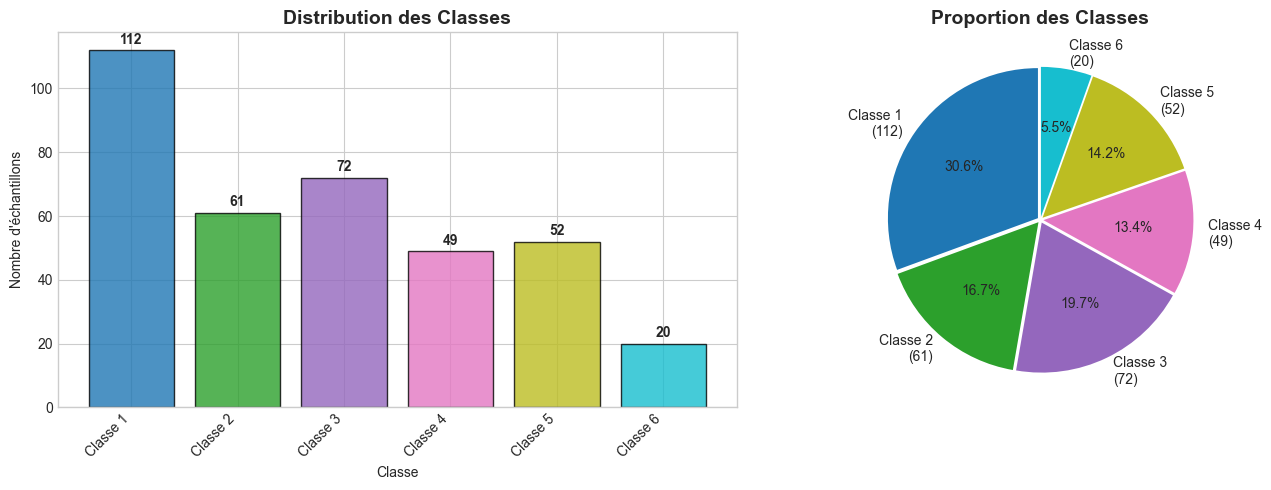

In [43]:
# =============================================================================
# VISUALISATION DE LA DISTRIBUTION DES CLASSES
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique en barres - utiliser tab10 au lieu de husl
colors = plt.cm.tab10(np.linspace(0, 1, len(le.classes_)))
axes[0].bar(range(len(le.classes_)), class_counts.values, color=colors, edgecolor='black', alpha=0.8)
axes[0].set_xticks(range(len(le.classes_)))
axes[0].set_xticklabels([f"Classe {c}" for c in le.classes_], rotation=45, ha='right')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Nombre d\'échantillons')
axes[0].set_title('Distribution des Classes', fontsize=14, fontweight='bold')

# Ajouter les valeurs sur les barres
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 2, str(v), ha='center', fontweight='bold')

# Graphique en camembert
axes[1].pie(class_counts.values, labels=[f"Classe {c}\n({v})" for c, v in zip(le.classes_, class_counts.values)], 
            colors=colors, autopct='%1.1f%%', startangle=90, explode=[0.02]*len(le.classes_))
axes[1].set_title('Proportion des Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Analyse de Corrélation des Features

📊 Calcul de la matrice de corrélation...


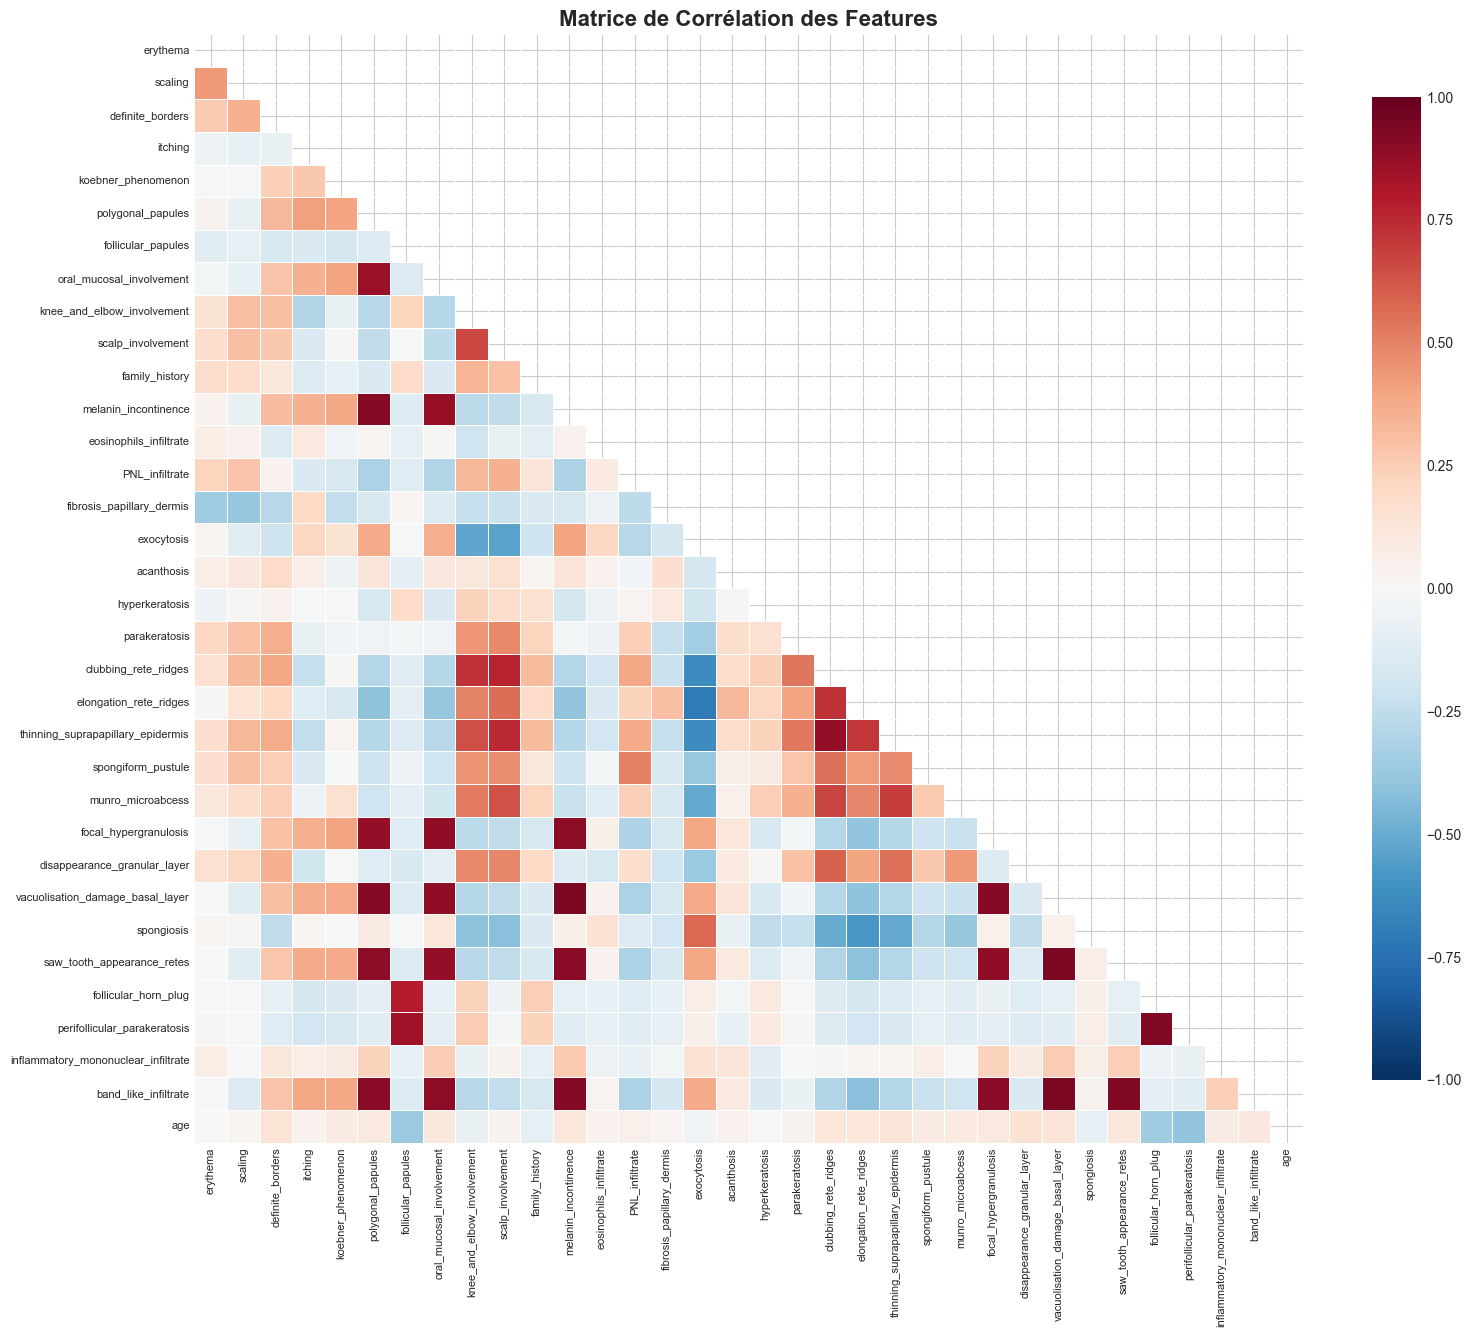

In [44]:
# =============================================================================
# MATRICE DE CORRÉLATION
# =============================================================================

print("📊 Calcul de la matrice de corrélation...")
print("=" * 80)

# Calculer la matrice de corrélation
corr_matrix = X_scaled.corr()

# Créer la heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Masque triangulaire supérieur

sns.heatmap(corr_matrix, mask=mask, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            annot=False, vmin=-1, vmax=1)

plt.title('Matrice de Corrélation des Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [45]:
# =============================================================================
# IDENTIFICATION DES PAIRES DE FEATURES FORTEMENT CORRÉLÉES
# =============================================================================

print("🔍 Features fortement corrélées (|r| > 0.7):")
print("=" * 80)

# Trouver les paires avec forte corrélation
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Corrélation': round(corr_matrix.iloc[i, j], 3)
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    high_corr_df = high_corr_df.sort_values(by='Corrélation', key=abs, ascending=False)
    print(high_corr_df.to_string(index=False))
    print(f"\n⚠️ {len(high_corr_pairs)} paires de features fortement corrélées détectées")
else:
    print("✅ Aucune paire de features avec corrélation > 0.7")

🔍 Features fortement corrélées (|r| > 0.7):
                       Feature 1                         Feature 2  Corrélation
            melanin_incontinence  vacuolisation_damage_basal_layer        0.942
vacuolisation_damage_basal_layer              band_like_infiltrate        0.938
vacuolisation_damage_basal_layer        saw_tooth_appearance_retes        0.938
            follicular_horn_plug      perifollicular_parakeratosis        0.929
      saw_tooth_appearance_retes              band_like_infiltrate        0.929
            melanin_incontinence              band_like_infiltrate        0.917
               polygonal_papules  vacuolisation_damage_basal_layer        0.912
           focal_hypergranulosis  vacuolisation_damage_basal_layer        0.910
               polygonal_papules              melanin_incontinence        0.907
               polygonal_papules              band_like_infiltrate        0.906
           focal_hypergranulosis              band_like_infiltrate        0.

## 7. PCA - Analyse en Composantes Principales

In [46]:
# =============================================================================
# APPLICATION DE PCA POUR CAPTURER 95% DE LA VARIANCE
# =============================================================================

print("🔬 Application de PCA...")
print("=" * 80)

# Mesurer le temps de calcul
start_time = time.time()

# PCA complet pour analyser la variance
pca_full = PCA()
pca_full.fit(X_scaled)

pca_time = time.time() - start_time

# Variance expliquée cumulative
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Trouver le nombre de composantes pour 95% de variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"⏱️ Temps de calcul PCA: {pca_time:.4f} secondes")
print(f"\n📊 Résultats PCA:")
print(f"   - Nombre total de composantes: {len(cumulative_variance)}")
print(f"   - Composantes pour 95% de variance: {n_components_95}")
print(f"   - Variance expliquée par les 3 premières composantes: {cumulative_variance[2]*100:.2f}%")

# Appliquer PCA avec le nombre optimal de composantes
pca_95 = PCA(n_components=n_components_95)
X_pca_95 = pca_95.fit_transform(X_scaled)

# PCA pour visualisation 2D et 3D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

🔬 Application de PCA...
⏱️ Temps de calcul PCA: 0.0080 secondes

📊 Résultats PCA:
   - Nombre total de composantes: 34
   - Composantes pour 95% de variance: 22
   - Variance expliquée par les 3 premières composantes: 52.44%


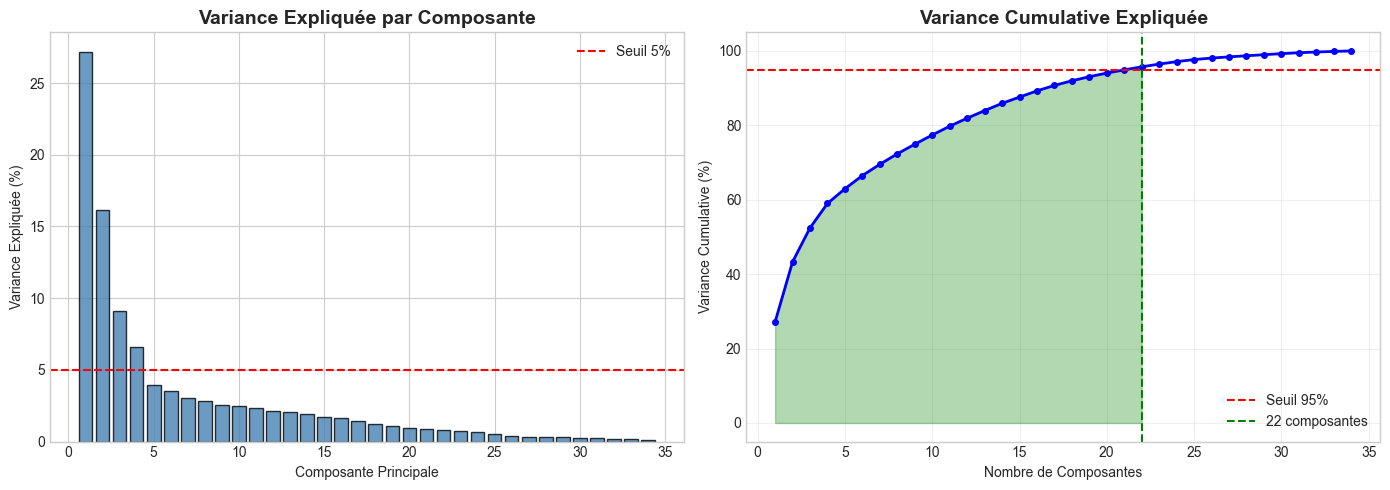


📊 Variance expliquée par les premières composantes:
   PC1: 27.18% (cumulé: 27.18%)
   PC2: 16.13% (cumulé: 43.30%)
   PC3: 9.14% (cumulé: 52.44%)
   PC4: 6.57% (cumulé: 59.01%)
   PC5: 3.94% (cumulé: 62.95%)
   PC6: 3.56% (cumulé: 66.50%)
   PC7: 3.02% (cumulé: 69.53%)
   PC8: 2.82% (cumulé: 72.35%)
   PC9: 2.57% (cumulé: 74.92%)
   PC10: 2.48% (cumulé: 77.40%)


In [47]:
# =============================================================================
# VISUALISATION DE LA VARIANCE EXPLIQUÉE PAR PCA
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Variance expliquée par composante
axes[0].bar(range(1, len(pca_full.explained_variance_ratio_)+1), 
            pca_full.explained_variance_ratio_*100, 
            color='steelblue', alpha=0.8, edgecolor='black')
axes[0].set_xlabel('Composante Principale')
axes[0].set_ylabel('Variance Expliquée (%)')
axes[0].set_title('Variance Expliquée par Composante', fontsize=14, fontweight='bold')
axes[0].axhline(y=5, color='red', linestyle='--', label='Seuil 5%')
axes[0].legend()

# Graphique 2: Variance cumulative
axes[1].plot(range(1, len(cumulative_variance)+1), cumulative_variance*100, 
             'b-o', markersize=4, linewidth=2)
axes[1].axhline(y=95, color='red', linestyle='--', label='Seuil 95%')
axes[1].axvline(x=n_components_95, color='green', linestyle='--', 
                label=f'{n_components_95} composantes')
axes[1].fill_between(range(1, n_components_95+1), 
                     cumulative_variance[:n_components_95]*100, 
                     alpha=0.3, color='green')
axes[1].set_xlabel('Nombre de Composantes')
axes[1].set_ylabel('Variance Cumulative (%)')
axes[1].set_title('Variance Cumulative Expliquée', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Afficher les détails des premières composantes
print("\n📊 Variance expliquée par les premières composantes:")
for i in range(min(10, len(pca_full.explained_variance_ratio_))):
    print(f"   PC{i+1}: {pca_full.explained_variance_ratio_[i]*100:.2f}% (cumulé: {cumulative_variance[i]*100:.2f}%)")

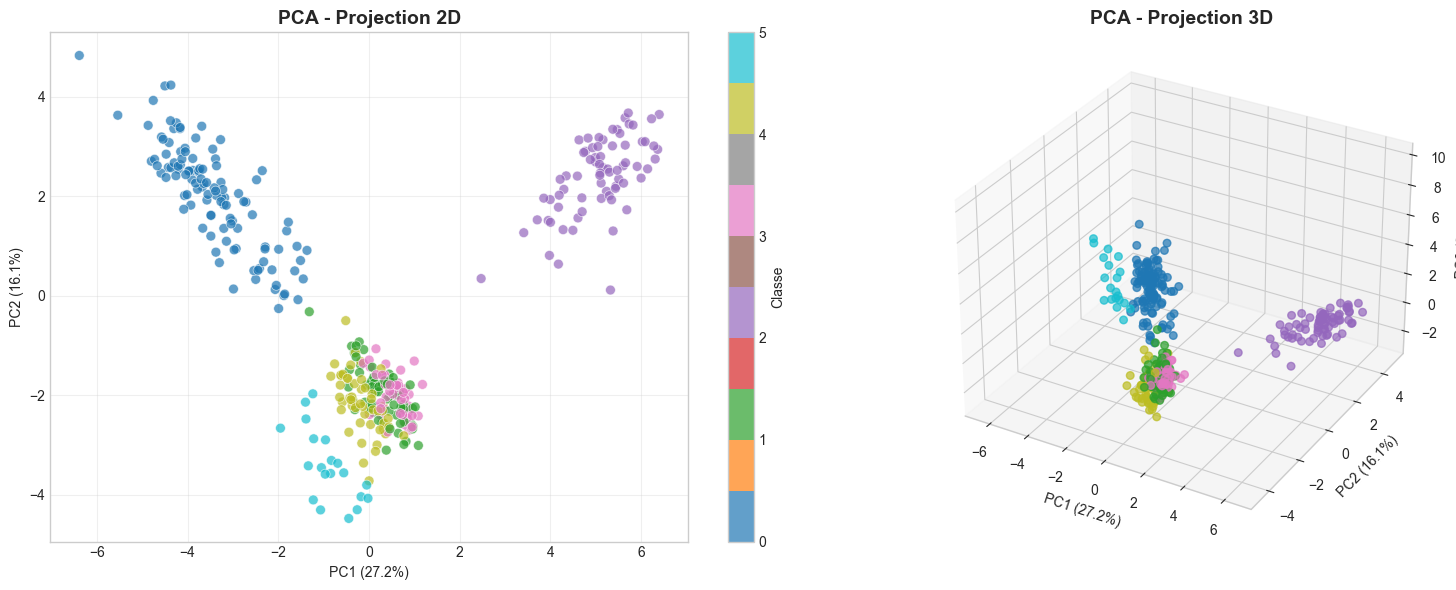

In [48]:
# =============================================================================
# SCATTER PLOTS PCA (2D ET 3D)
# =============================================================================

fig = plt.figure(figsize=(16, 6))

# PCA 2D
ax1 = fig.add_subplot(121)
scatter = ax1.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_encoded, 
                      cmap='tab10', alpha=0.7, s=50, edgecolors='white', linewidth=0.5)
ax1.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
ax1.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
ax1.set_title('PCA - Projection 2D', fontsize=14, fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Classe')
ax1.grid(True, alpha=0.3)

# PCA 3D
ax2 = fig.add_subplot(122, projection='3d')
scatter3d = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                        c=y_encoded, cmap='tab10', alpha=0.7, s=30)
ax2.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)')
ax2.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)')
ax2.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)')
ax2.set_title('PCA - Projection 3D', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

📊 Contributions des features aux composantes principales (Loadings):


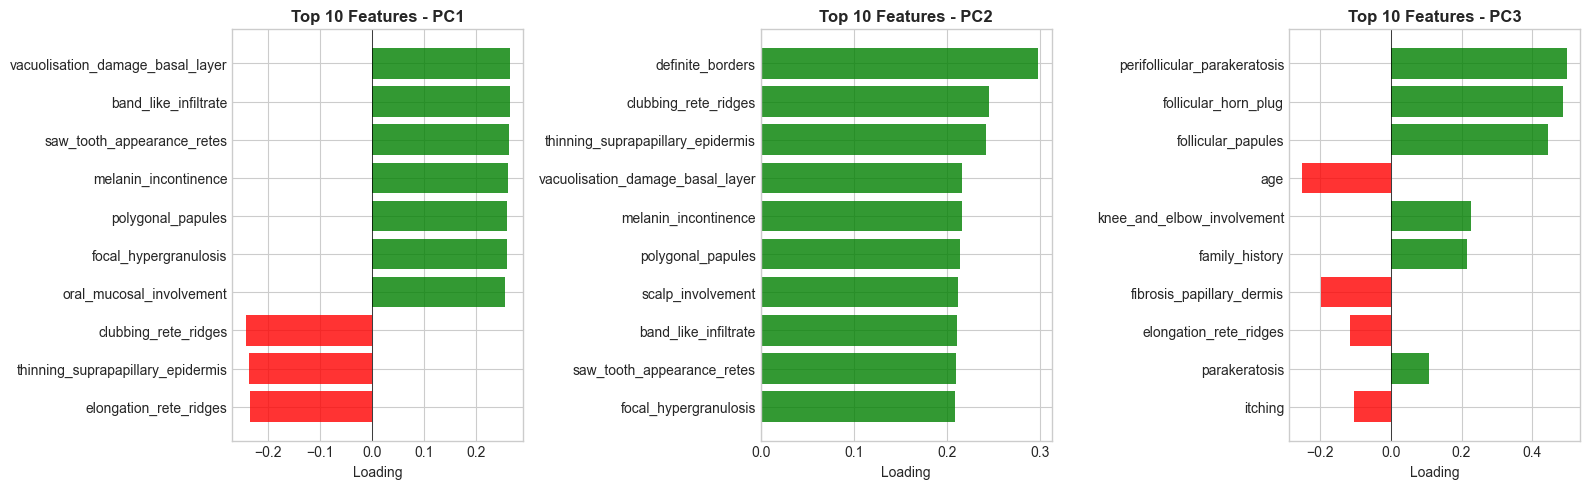

In [49]:
# =============================================================================
# ANALYSE DES LOADINGS PCA
# =============================================================================

print("📊 Contributions des features aux composantes principales (Loadings):")
print("=" * 80)

# Créer un DataFrame des loadings
loadings = pd.DataFrame(
    pca_3d.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=numeric_cols
)

# Top 5 features pour chaque composante
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, pc in enumerate(['PC1', 'PC2', 'PC3']):
    top_features = loadings[pc].abs().sort_values(ascending=False).head(10)
    colors = ['green' if loadings.loc[f, pc] > 0 else 'red' for f in top_features.index]
    axes[i].barh(range(len(top_features)), loadings.loc[top_features.index, pc], color=colors, alpha=0.8)
    axes[i].set_yticks(range(len(top_features)))
    axes[i].set_yticklabels(top_features.index)
    axes[i].set_xlabel('Loading')
    axes[i].set_title(f'Top 10 Features - {pc}', fontsize=12, fontweight='bold')
    axes[i].axvline(x=0, color='black', linewidth=0.5)
    axes[i].invert_yaxis()

plt.tight_layout()
plt.show()